#### Folder Names 

In [1]:
import sys, os
current_folder_location = os.getcwd()
data_folder = current_folder_location + '\\data\\'
raw_data_folder = data_folder + 'raw_data\\'
clean_data_folder = data_folder + 'clean_data\\'

### Importing libraries 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [3]:
sales = pd.read_csv(raw_data_folder + 'sales.csv')
customers = pd.read_csv(raw_data_folder +'customers.csv')
orders = pd.read_csv(raw_data_folder + 'orders.csv')
products = pd.read_csv(raw_data_folder + 'products.csv')

In [4]:
sales

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339
...,...,...,...,...,...,...
4995,4995,998,321,109,2,218
4996,4996,998,251,95,3,285
4997,4997,999,872,113,1,113
4998,4998,999,998,106,2,212


In [5]:
customers

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia
...,...,...,...,...,...,...,...,...,...
995,996,Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia
996,997,Dickie Grushin,Non-binary,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia
998,999,Carita Vynarde,Polygender,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia


In [6]:
customers.drop('country', axis=1, inplace=True)

In [7]:
customers

,customer_id,customer_name,gender,age,home_address,zip_code,city,state
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland
...,...,...,...,...,...,...,...,...
995,996,Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania
996,997,Dickie Grushin,Non-binary,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland
998,999,Carita Vynarde,Polygender,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia


In [8]:
city_group_1 = customers.groupby('state')['age'].count().to_frame()
city_group_1.reset_index(inplace=True)
city_group_1.rename(columns={'age':'number of orders'}, inplace=True)
city_group_1 = city_group_1.sort_values(by='number of orders', ascending=False)

### Number of Orders Per State

In [9]:
city_group_1

,state,number of orders
4,South Australia,139
3,Queensland,134
1,New South Wales,132
2,Northern Territory,125
7,Western Australia,124
0,Australian Capital Territory,121
6,Victoria,121
5,Tasmania,104


Text(0.5, 1.0, 'Numbers of Order per state')

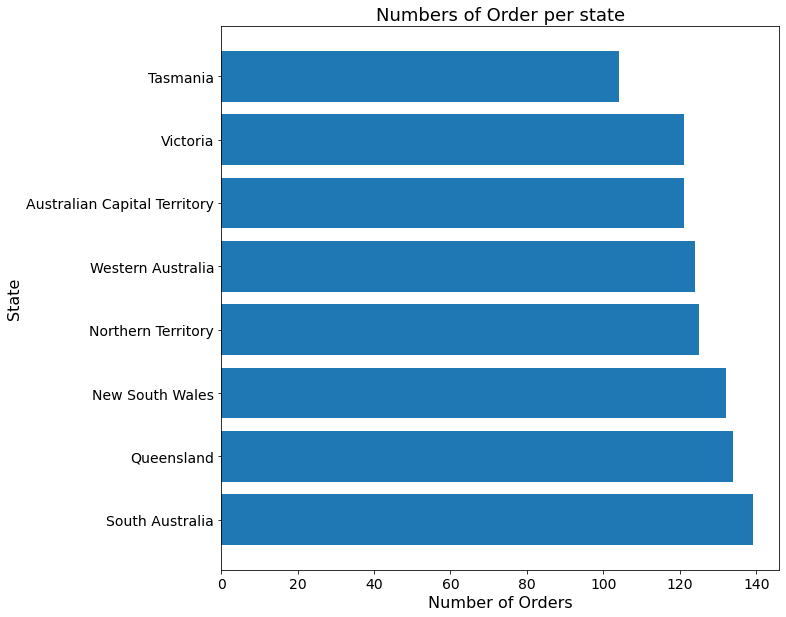

In [10]:
state = city_group_1['state']
number_of_orders = city_group_1['number of orders']


plt.figure(figsize=(10,10))
plt.barh(state,number_of_orders)
plt.ylabel('State', fontsize=16)
plt.xlabel('Number of Orders', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Numbers of Order per state', fontsize=18)

In [11]:
orders

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24
...,...,...,...,...,...
995,996,345,37843,2021-1-13,2021-02-02
996,997,346,53831,2021-1-18,2021-01-31
997,998,407,53308,2021-5-5,2021-05-21
998,999,428,31643,2021-6-15,2021-07-12


In [12]:
orders[['order_date', 'delivery_date' ]] =orders[['order_date', 'delivery_date' ]].apply(pd.to_datetime)

#my_df[['column1','column2']] = my_df[['column1','column2']].apply(pd.to_datetime)

In [13]:
orders['Delivery_time'] = orders['delivery_date'] - orders['order_date']

In [14]:
orders['Year'] = orders['order_date'].dt.year
orders['Month'] = orders['order_date'].dt.month
#orders['Month'] = orders['Month'].apply(lambda x: calendar.month_abbr[x])
orders['Day'] = orders['order_date'].dt.day

In [15]:
orders

,order_id,customer_id,payment,order_date,delivery_date,Delivery_time,Year,Month,Day
0,1,64,30811,2021-08-30,2021-09-24,25 days,2021,8,30
1,2,473,50490,2021-02-03,2021-02-13,10 days,2021,2,3
2,3,774,46763,2021-10-08,2021-11-03,26 days,2021,10,8
3,4,433,39782,2021-05-06,2021-05-19,13 days,2021,5,6
4,5,441,14719,2021-03-23,2021-03-24,1 days,2021,3,23
...,...,...,...,...,...,...,...,...,...
995,996,345,37843,2021-01-13,2021-02-02,20 days,2021,1,13
996,997,346,53831,2021-01-18,2021-01-31,13 days,2021,1,18
997,998,407,53308,2021-05-05,2021-05-21,16 days,2021,5,5
998,999,428,31643,2021-06-15,2021-07-12,27 days,2021,6,15


In [16]:
products

,product_ID,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"
...,...,...,...,...,...,...,...,...
1255,1255,Trousers,Tracksuit Bottoms,XS,violet,91,67,"A violet coloured, XS sized, Tracksuit Bottoms..."
1256,1256,Trousers,Tracksuit Bottoms,S,violet,91,48,"A violet coloured, S sized, Tracksuit Bottoms ..."
1257,1257,Trousers,Tracksuit Bottoms,M,violet,91,73,"A violet coloured, M sized, Tracksuit Bottoms ..."
1258,1258,Trousers,Tracksuit Bottoms,L,violet,91,45,"A violet coloured, L sized, Tracksuit Bottoms ..."


In [17]:
products['product_name'].nunique()

35

### Sales by Product ID, What Product has generated highest revenue?

In [18]:
revenue_per_product = sales.groupby('product_id')['total_price'].sum().to_frame().reset_index()
revenue_per_product = revenue_per_product.sort_values(by='total_price', ascending=False).head(20)
revenue_per_product

,product_id,total_price
76,78,2832
465,472,2714
695,707,2499
570,579,2400
824,843,2373
478,486,2360
725,740,2289
713,727,2261
180,182,2254
73,74,2124


In [19]:
filter_products = products["product_ID"].isin(revenue_per_product.loc[:, 'product_id']) # selecting all rows from revenue product df under product_id column

In [20]:
filtered_products_top_rev = products[filter_products]

In [21]:
filtered_products_top_rev

,product_ID,product_type,product_name,size,colour,price,quantity,description
74,74,Shirt,Flannel,XL,red,96,72,"A red coloured, XL sized, Flannel Shirt"
78,78,Shirt,Flannel,L,orange,96,59,"A orange coloured, L sized, Flannel Shirt"
95,95,Shirt,Flannel,XS,indigo,96,46,"A indigo coloured, XS sized, Flannel Shirt"
182,182,Shirt,Camp Collared,M,orange,112,65,"A orange coloured, M sized, Camp Collared Shirt"
222,222,Shirt,Chambray,M,yellow,105,62,"A yellow coloured, M sized, Chambray Shirt"
316,316,Shirt,Mandarin Collar,S,red,108,48,"A red coloured, S sized, Mandarin Collar Shirt"
405,405,Shirt,Casual Slim Fit,XS,blue,113,55,"A blue coloured, XS sized, Casual Slim Fit Shirt"
465,465,Jacket,Puffer,XS,yellow,110,55,"A yellow coloured, XS sized, Puffer Jacket"
472,472,Jacket,Puffer,M,green,110,72,"A green coloured, M sized, Puffer Jacket"
486,486,Jacket,Puffer,S,violet,110,46,"A violet coloured, S sized, Puffer Jacket"


In [22]:
filtered_products_top_rev['product_name'].nunique()

13

#### Product Name That generated highest Revenue

In [23]:
filtered_products_top_rev_copy = filtered_products_top_rev.copy()
filtered_products_top_rev_copy = filtered_products_top_rev_copy.sort_values(by='product_ID', ascending=False)

revenue_per_product_copy = revenue_per_product.copy()
revenue_per_product_copy = revenue_per_product_copy.rename(columns={'product_id':'product_ID'})
revenue_per_product_copy = revenue_per_product_copy.sort_values(by='product_ID', ascending=False)

In [24]:
filtered_products_top_rev_FINAL = pd.merge(left=revenue_per_product_copy, right=filtered_products_top_rev_copy, how='inner', on='product_ID' )
filtered_products_top_rev_FINAL

,product_ID,total_price,product_type,product_name,size,colour,price,quantity,description
0,1188,1980,Trousers,High-Waisted,L,violet,98,68,"A violet coloured, L sized, High-Waisted Trousers"
1,1184,1980,Trousers,High-Waisted,XL,indigo,98,57,"A indigo coloured, XL sized, High-Waisted Trou..."
2,1091,1955,Trousers,Cropped,S,orange,99,78,"A orange coloured, S sized, Cropped Trousers"
3,843,2373,Trousers,Chinos,L,red,100,44,"A red coloured, L sized, Chinos Trousers"
4,830,1989,Jacket,Shearling,XS,indigo,95,68,"A indigo coloured, XS sized, Shearling Jacket"
5,810,2106,Jacket,Shearling,XS,orange,95,54,"A orange coloured, XS sized, Shearling Jacket"
6,740,2289,Jacket,Peacoat,XS,orange,102,78,"A orange coloured, XS sized, Peacoat Jacket"
7,727,2261,Jacket,Trench Coat,M,indigo,112,42,"A indigo coloured, M sized, Trench Coat Jacket"
8,707,2499,Jacket,Trench Coat,M,orange,112,43,"A orange coloured, M sized, Trench Coat Jacket"
9,579,2400,Jacket,Bomber,XL,green,90,79,"A green coloured, XL sized, Bomber Jacket"


In [25]:
filtered_products_top_rev_FINAL['product_name_and_size'] = filtered_products_top_rev_FINAL['product_name'] + ', ' + filtered_products_top_rev_FINAL['size']

In [26]:
filtered_products_top_rev_FINAL_grouped = filtered_products_top_rev_FINAL.groupby('product_name_and_size')['total_price'].sum().to_frame()
filtered_products_top_rev_FINAL_grouped = filtered_products_top_rev_FINAL_grouped.reset_index()
filtered_products_top_rev_FINAL_grouped

,product_name_and_size,total_price
0,"Bomber, XL",2400
1,"Camp Collared, M",2254
2,"Casual Slim Fit, XS",2023
3,"Chambray, M",2014
4,"Chinos, L",2373
5,"Cropped, S",1955
6,"Flannel, L",2832
7,"Flannel, XL",2124
8,"Flannel, XS",2124
9,"High-Waisted, L",1980


Text(0.5, 1.0, 'Total Revenue Per Product')

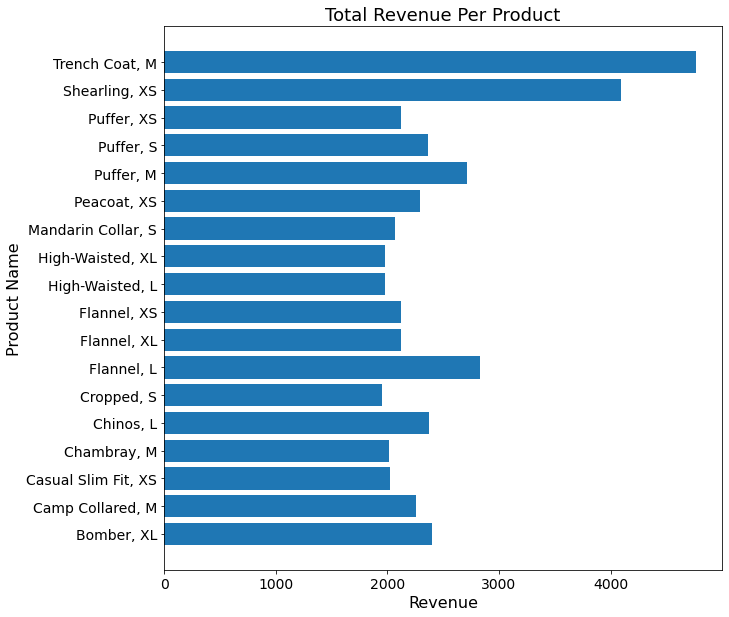

In [27]:
plt.figure(figsize=(10,10))
plt.barh(filtered_products_top_rev_FINAL_grouped['product_name_and_size'],filtered_products_top_rev_FINAL_grouped['total_price'])
plt.ylabel('Product Name', fontsize=16)
plt.xlabel('Revenue', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Total Revenue Per Product', fontsize=18)


##### To make sure that all product ID rows are in filtered top products revenue dataframe

In [28]:
#df['your_column_name'].isin(df2['your_column_name']).value_counts()

filtered_products_top_rev['product_ID'].isin(revenue_per_product['product_id']).value_counts()

True    20
Name: product_ID, dtype: int64

### Top 20 Customers 

In [29]:
top_price_by_order = sales.groupby('order_id')['total_price'].sum()
top_price_by_order = top_price_by_order.to_frame()

In [30]:
top_price_by_order.reset_index(inplace=True)

In [31]:
top_price_by_order = top_price_by_order.sort_values(by='total_price', ascending=False)
top_price_by_order

,order_id,total_price
76,77,2733
250,252,2597
959,966,2550
662,668,2539
699,705,2495
...,...,...
154,155,102
69,70,100
912,919,96
825,832,95


In [32]:
top_price_by_order_1 = top_price_by_order.copy()
top_price_by_order_1 = top_price_by_order_1.sort_values(by='order_id', ascending=False)

In [33]:
#top_price_by_order_1

In [34]:
filter_orders = orders["order_id"].isin(top_price_by_order.loc[:, 'order_id'])

In [35]:
filtered_order_top_rev = orders[filter_orders]
filtered_order_top_rev = filtered_order_top_rev[['order_id', 'customer_id']]
#filtered_order_top_rev

In [36]:
filtered_order_top_rev_1 = filtered_order_top_rev.copy()
filtered_order_top_rev_1 = filtered_order_top_rev_1.sort_values(by='order_id', ascending=False)
filtered_order_top_rev_1

,order_id,customer_id
998,999,428
997,998,407
996,997,346
995,996,345
994,995,15
...,...,...
4,5,441
3,4,433
2,3,774
1,2,473


In [37]:
filtered_order_top_rev_updated = pd.merge(left=top_price_by_order_1, right=filtered_order_top_rev_1, how='inner', on='order_id' )
filtered_order_top_rev_updated

,order_id,total_price,customer_id
0,999,440,428
1,998,1352,407
2,997,204,346
3,996,1459,345
4,995,1127,15
...,...,...,...
988,5,2043,441
989,4,976,433
990,3,508,774
991,2,1130,473


In [38]:
filtered_order_top_rev_index = filtered_order_top_rev.index
top_price_by_order_index = top_price_by_order.index

##### Checking if index from two dataframes are the same 

In [39]:
# Checking the equality of the two Indexes
top_price_by_order_index.equals(filtered_order_top_rev_index)

False

##### To make sure customer_ID has no duplicates

In [40]:
#df['Student'].is_unique

filtered_order_top_rev_updated['customer_id'].is_unique

# equals true in case of no duplicates

False

In [41]:
if filtered_order_top_rev_updated['customer_id'].is_unique:
    print('No duplicates')

else:
    print('there are duplicates')

there are duplicates


#### Printing duplicate rows

In [42]:
#duplicate = df[df.duplicated()]

duplicated_rows = filtered_order_top_rev_updated[filtered_order_top_rev_updated.duplicated('customer_id')]

In [43]:
duplicated_rows

,order_id,total_price,customer_id
33,966,2550,639
59,940,2289,813
66,933,1173,595
73,926,1313,123
74,925,927,272
...,...,...,...
987,6,732,800
988,5,2043,441
989,4,976,433
990,3,508,774


#### Updating filtered orders top revenue after modifying duplicated rows

In [44]:
# There are duplicates in this one
filtered_order_top_rev_updated

,order_id,total_price,customer_id
0,999,440,428
1,998,1352,407
2,997,204,346
3,996,1459,345
4,995,1127,15
...,...,...,...
988,5,2043,441
989,4,976,433
990,3,508,774
991,2,1130,473


In [45]:
filtered_order_top_rev_updated[filtered_order_top_rev_updated['customer_id'] == 683]

,order_id,total_price,customer_id
215,783,781,683
682,312,2279,683
742,252,2597,683


In [46]:
filtered_order_top_rev_updated = filtered_order_top_rev_updated.groupby('customer_id')['total_price'].sum().to_frame()
filtered_order_top_rev_updated = filtered_order_top_rev_updated.reset_index()

In [47]:
filtered_order_top_rev_updated

,customer_id,total_price
0,1,1641
1,7,1017
2,10,270
3,11,382
4,12,1551
...,...,...
611,994,1716
612,995,2140
613,996,3045
614,998,4415


In [48]:
if filtered_order_top_rev_updated['customer_id'].is_unique:
    print('Now!!! You have NO duplicates!!!!')

else:
    print('there are duplicates')


Now!!! You have NO duplicates!!!!


In [49]:
#filtered_order_top_rev_updated = filtered_order_top_rev_updated.sort_values(by='total_price', ascending=False)
#filtered_order_top_rev_updated = filtered_order_top_rev_updated.head(50)
#filtered_order_top_rev_updated

##### Verification to make sure Order IDs match with Dataframes from TOP Order Revenue

In [50]:
filtered_order_top_rev['order_id'].isin(top_price_by_order['order_id']).value_counts()

True    993
Name: order_id, dtype: int64

In [51]:
filtered_customers = customers['customer_id'].isin(filtered_order_top_rev_updated.loc[:, 'customer_id'])

#### FINAL DATAFRAME FOR TOP 20 CUstomers

In [52]:
filtered_customers_top_rev = customers[filtered_customers]
filtered_customers_top_rev = filtered_customers_top_rev[['customer_id','customer_name', 'age', 'home_address', 'zip_code', 'city', 'state']]
filtered_customers_top_rev

,customer_id,customer_name,age,home_address,zip_code,city,state
0,1,Leanna Busson,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory
6,7,Winslow Ewbanck,76,92 Hills Station StApt. 683,793,Masonfurt,Queensland
9,10,Susanetta Wilshin,70,615 Hayley KnollSuite 454,2118,Joelburgh,Western Australia
10,11,Michaeline McIndrew,39,96 Daniel PlaceSuite 898,7400,Georgeland,Northern Territory
11,12,Fedora Dmych,78,66 Kayla MewsSuite 951,6334,Taylorburgh,South Australia
...,...,...,...,...,...,...,...
993,994,Vanna Densham,53,3128 Ivy CircleSuite 713,508,Hallshire,Western Australia
994,995,Leandra Derks,63,19 Jordan Station StSuite 655,3742,Hermistonberg,Western Australia
995,996,Elvira Sarfati,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania
997,998,Rebecka Fabler,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland


#### FINAL DATAFRAME FOR TOP 20 CUstomers with Price

In [53]:
filtered_order_top_rev_updated_copy = filtered_order_top_rev_updated.copy()
filtered_order_top_rev_updated_copy = filtered_order_top_rev_updated_copy.sort_values(by='customer_id', ascending=False)
filtered_customers_top_rev_copy = filtered_customers_top_rev.copy()
filtered_customers_top_rev_copy = filtered_customers_top_rev_copy.sort_values(by='customer_id', ascending=False)
filtered_order_top_rev_updated_FINAL = pd.merge(left=filtered_order_top_rev_updated_copy, right= filtered_customers_top_rev_copy, how='inner', on='customer_id')
filtered_order_top_rev_updated_FINAL = filtered_order_top_rev_updated_FINAL.sort_values(by='total_price', ascending=False)
filtered_order_top_rev_updated_FINAL

,customer_id,total_price,customer_name,age,home_address,zip_code,city,state
449,282,7632,Wren Helgass,59,2634 Ward CrescentSuite 361,4527,Port Hannahburgh,Australian Capital Territory
265,571,6640,Kristofor Roos,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory
206,664,6341,Dannie Fidler,32,157 Rohan MallApt. 466,4145,East Max,Tasmania
193,683,5657,Esteban Hensmans,45,098 Clarke ParkwayApt. 312,3661,West Finnberg,Australian Capital Territory
495,206,5581,Crin Johnikin,66,09 Kiehn View RdApt. 209,2155,South Clairetown,Queensland
...,...,...,...,...,...,...,...,...
73,874,200,Prissie Kondratovich,65,20 Hyatt LaneSuite 740,3840,South Zacmouth,Western Australia
19,969,186,Ginnie Glasheen,77,08 Howe BoulevardApt. 286,9561,West Stella,South Australia
589,47,183,Jarrett Brumby,54,59 Wood DriveSuite 806,9780,Lake Nicholasfurt,Western Australia
106,818,112,Nathaniel McCandless,59,5085 Bergstrom MewsApt. 347,3302,West Eviebury,Western Australia


In [54]:
#filtered_order_top_rev_updated_FINAL

In [55]:
#filtered_order_top_rev_updated

#### Verification

##### To make sure that final dataframe customer_id are the same as other dataframe of updated top rev

In [56]:
filtered_order_top_rev_updated_FINAL['customer_id'].isin(filtered_order_top_rev_updated['customer_id']).value_counts()

True    616
Name: customer_id, dtype: int64

##### To make sure that there are no Duplicates in customer_id

In [57]:
filtered_order_top_rev_updated_FINAL['customer_id'].is_unique

True

### THIS IS THE FINAL DATAFRAME FOR TOP 20 CUSTOMERS

In [58]:
TOP_20_BEST_customers_updated_FINAL = filtered_order_top_rev_updated_FINAL.head(20)
TOP_20_BEST_customers_updated_FINAL

,customer_id,total_price,customer_name,age,home_address,zip_code,city,state
449,282,7632,Wren Helgass,59,2634 Ward CrescentSuite 361,4527,Port Hannahburgh,Australian Capital Territory
265,571,6640,Kristofor Roos,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory
206,664,6341,Dannie Fidler,32,157 Rohan MallApt. 466,4145,East Max,Tasmania
193,683,5657,Esteban Hensmans,45,098 Clarke ParkwayApt. 312,3661,West Finnberg,Australian Capital Territory
495,206,5581,Crin Johnikin,66,09 Kiehn View RdApt. 209,2155,South Clairetown,Queensland
269,566,5435,Melissa Partkya,23,95 Rice Station StSuite 985,2919,O'keefeton,Tasmania
403,348,5119,Thorny Nornable,76,4070 Nathan CircuitSuite 296,1840,Rubyfort,Tasmania
109,813,4969,Saul Franklyn,62,82 Kirlin StreetSuite 641,372,Tillmanview,New South Wales
328,465,4807,Mallory Castellani,38,115 Wilkinson CrestSuite 858,4700,Williammouth,Victoria
169,727,4428,Herschel Verdey,26,2752 Lily RoadApt. 721,3249,Jacobport,New South Wales


## DElIVERY TIME FOR BEST CUSTOMERS

In [59]:
filtered_orders_updated_FOR_TOP_20 = orders['customer_id'].isin(TOP_20_BEST_customers_updated_FINAL['customer_id'])

#orders["order_id"].isin(top_price_by_order.loc[:, 'order_id'])

In [60]:
filtered_order_top_rev_LATEST_DATAFRAME = orders[filtered_orders_updated_FOR_TOP_20]
#filtered_order_top_rev_LATEST_DATAFRAME

In [61]:
grouped_filtered_order_top_rev_LATEST_DATAFRAME = filtered_order_top_rev_LATEST_DATAFRAME.sort_values(by='Delivery_time', ascending=False)
grouped_filtered_order_top_rev_LATEST_DATAFRAME

,order_id,customer_id,payment,order_date,delivery_date,Delivery_time,Year,Month,Day
253,254,571,57662,2021-08-07,2021-09-03,27 days,2021,8,7
152,153,727,49677,2021-10-21,2021-11-17,27 days,2021,10,21
377,378,623,37922,2021-09-29,2021-10-25,26 days,2021,9,29
311,312,683,38591,2021-07-06,2021-07-31,25 days,2021,7,6
30,31,727,15722,2021-03-11,2021-04-05,25 days,2021,3,11
...,...,...,...,...,...,...,...,...,...
470,471,282,56849,2021-07-08,2021-07-10,2 days,2021,7,8
555,556,566,40530,2021-07-30,2021-08-01,2 days,2021,7,30
984,985,581,59558,2021-02-07,2021-02-09,2 days,2021,2,7
941,942,282,46279,2021-06-09,2021-06-10,1 days,2021,6,9


In [62]:
grouped_filtered_order_top_rev_LATEST_DATAFRAME.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 253 to 198
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   order_id       76 non-null     int64          
 1   customer_id    76 non-null     int64          
 2   payment        76 non-null     int64          
 3   order_date     76 non-null     datetime64[ns] 
 4   delivery_date  76 non-null     datetime64[ns] 
 5   Delivery_time  76 non-null     timedelta64[ns]
 6   Year           76 non-null     int64          
 7   Month          76 non-null     int64          
 8   Day            76 non-null     int64          
dtypes: datetime64[ns](2), int64(6), timedelta64[ns](1)
memory usage: 5.9 KB


In [63]:
grouped_filtered_order_top_rev_LATEST_DATAFRAME['Delivery_time'] = grouped_filtered_order_top_rev_LATEST_DATAFRAME['Delivery_time'].dt.days.astype('int64')

In [64]:
grouped_filtered_order_top_rev_LATEST_DATAFRAME

,order_id,customer_id,payment,order_date,delivery_date,Delivery_time,Year,Month,Day
253,254,571,57662,2021-08-07,2021-09-03,27,2021,8,7
152,153,727,49677,2021-10-21,2021-11-17,27,2021,10,21
377,378,623,37922,2021-09-29,2021-10-25,26,2021,9,29
311,312,683,38591,2021-07-06,2021-07-31,25,2021,7,6
30,31,727,15722,2021-03-11,2021-04-05,25,2021,3,11
...,...,...,...,...,...,...,...,...,...
470,471,282,56849,2021-07-08,2021-07-10,2,2021,7,8
555,556,566,40530,2021-07-30,2021-08-01,2,2021,7,30
984,985,581,59558,2021-02-07,2021-02-09,2,2021,2,7
941,942,282,46279,2021-06-09,2021-06-10,1,2021,6,9


In [65]:
grouped_filtered_order_top_rev_LATEST_DATAFRAME.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 253 to 198
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       76 non-null     int64         
 1   customer_id    76 non-null     int64         
 2   payment        76 non-null     int64         
 3   order_date     76 non-null     datetime64[ns]
 4   delivery_date  76 non-null     datetime64[ns]
 5   Delivery_time  76 non-null     int64         
 6   Year           76 non-null     int64         
 7   Month          76 non-null     int64         
 8   Day            76 non-null     int64         
dtypes: datetime64[ns](2), int64(7)
memory usage: 5.9 KB


In [66]:
#grouped_single = df.groupby('Team').agg({'Age': ['mean', 'min', 'max']})

grouped_filtered_order_top_rev_LATEST_DATAFRAME_agg= grouped_filtered_order_top_rev_LATEST_DATAFRAME.groupby('customer_id').agg({'Delivery_time': ['mean', 'min', 'max']}).round(0)
grouped_filtered_order_top_rev_LATEST_DATAFRAME_agg


Delivery_time        
                     mean min max
customer_id                      
107                  14.0  11  20
129                  13.0   7  17
206                   7.0   1  16
244                  13.0   5  20
282                   8.0   1  21
348                  18.0  13  24
382                  16.0  14  19
465                  14.0   4  22
566                  11.0   2  20
571                  17.0   9  27
581                   9.0   2  21
623                  14.0   6  26
643                   8.0   3  11
664                  21.0  17  24
683                  17.0   2  25
727                  22.0  17  27
732                  16.0   9  21
813                  19.0  14  23
908                  18.0  12  21
998                  13.0   3  23

In [67]:
grouped_filtered_order_top_rev_LATEST_DATAFRAME_agg.columns

MultiIndex([('Delivery_time', 'mean'),
            ('Delivery_time',  'min'),
            ('Delivery_time',  'max')],
           )